In [176]:
import pandas as pd
from sklearn.linear_model import Lasso
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
import matplotlib.pyplot as plt
import statistics
import json
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [177]:
df = pd.read_csv(r"C:\Users\benja\OneDrive\Documents\Classes\Machine Learning\ML Final\class_final_proportion.csv")
df = df.drop(columns = ['party', 'country', 'cabinet_name', 'party_name', 'party_name_english', 'election_date', 'start_date', 'election_year', 'coalition_total', 'left_righty', 
'A', 'country_dummy1', 'country_dummy2', 'country_dummy3', 'country_dummy4', 'country_dummy5', 'country_dummy6', 'country_dummy7', 'country_dummy8', 'country_dummy9',
'country_dummy10', 'country_dummy11','country_dummy12','country_dummy13', 'cabinet_id', 'party_id', 'caretaker', 'left_rightx', 'total_cabinet_size', 'country_id', 'election_id',
'post_election', 'mingov', 'bicameral', 'seats_total', 'W', 'B', 'B_star', 'C', 'D', 'E', 'enpp', 'miw_new', 'party_count', 'cab_count','cabinet_seats', 'base'], axis = 1)
#Making sure all the data is in number format so it can be used 
df.replace(' ', np.nan, inplace=True)
# Convert all columns to numeric in a Pandas DataFrame
df = df.apply(pd.to_numeric, errors='coerce')

# Define the dependent variable and column names
dependent_variable = 'cabinet_proportion'
#print(df.describe())
column_names = df.columns.tolist()

#Change important_columns based on what the IVs are
important_columns = [column_names]

# #Uncomment below if not imputing
# df = df.dropna()
#IMPUTING WITH KNN
# Specify the number of neighbors 
k_neighbors = 2

# Create KNN imputer
knn_imputer = KNNImputer(n_neighbors=k_neighbors)

# Perform imputation
df_knn = knn_imputer.fit_transform(df)

# Convert the NumPy array back to a DataFrame
df = pd.DataFrame(df_knn, columns=df.columns)

# Function to identify outliers using IQR
def find_outliers_iqr(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1

    # Define lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify outliers
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

# Identify outliers for each column
outliers_dict = {}
outliers_dependent_var = find_outliers_iqr(df[dependent_variable])

# # Display the DataFrame without outliers in the dependent variable
print("DataFrame without outliers in the dependent variable:")
print(df[~outliers_dependent_var][dependent_variable].describe())

# #Print the DataFrame with just the outliers
print("Outliers")
print(df[outliers_dependent_var][dependent_variable].describe())

#Print a summary of the data after imputing
# print("DF After Imputing")
# print(df.describe())
print(df[dependent_variable].describe())

# # Remove rows with outliers in the dependent variable
# # Since the data in this case is heavily zero-inflated, resulting in so many outliers, we DO NOT drop the outliers
# df = df[~outliers_dependent_var]

print(df.describe())
X = df.drop(dependent_variable, axis = 'columns')
Y = df[dependent_variable]


#get summary of data and save it to a csv file
# df[important_columns].describe().to_csv('SummaryRaw.csv', index = False)
# df_filled[important_columns].describe().to_csv('SummaryFiltered.csv', index= False)

DataFrame without outliers in the dependent variable:
count    591.000000
mean       0.068473
std        0.129836
min        0.000000
25%        0.000000
50%        0.000000
75%        0.076923
max        0.473684
Name: cabinet_proportion, dtype: float64
Outliers
count    66.000000
mean      0.674734
std       0.173407
min       0.500000
25%       0.530392
50%       0.594118
75%       0.796429
max       1.000000
Name: cabinet_proportion, dtype: float64
count    657.000000
mean       0.129376
std        0.226728
min        0.000000
25%        0.000000
50%        0.000000
75%        0.190476
max        1.000000
Name: cabinet_proportion, dtype: float64
            seats  sq_cabinet       sq_pm     banzhaf     shapley       splus  \
count  657.000000  657.000000  657.000000  657.000000  657.000000  657.000000   
mean    32.100457    0.322679    0.126332    0.129328    0.129337    0.129289   
std     46.440287    0.467042    0.332476    0.144730    0.140964    0.140634   
min      1.000000 

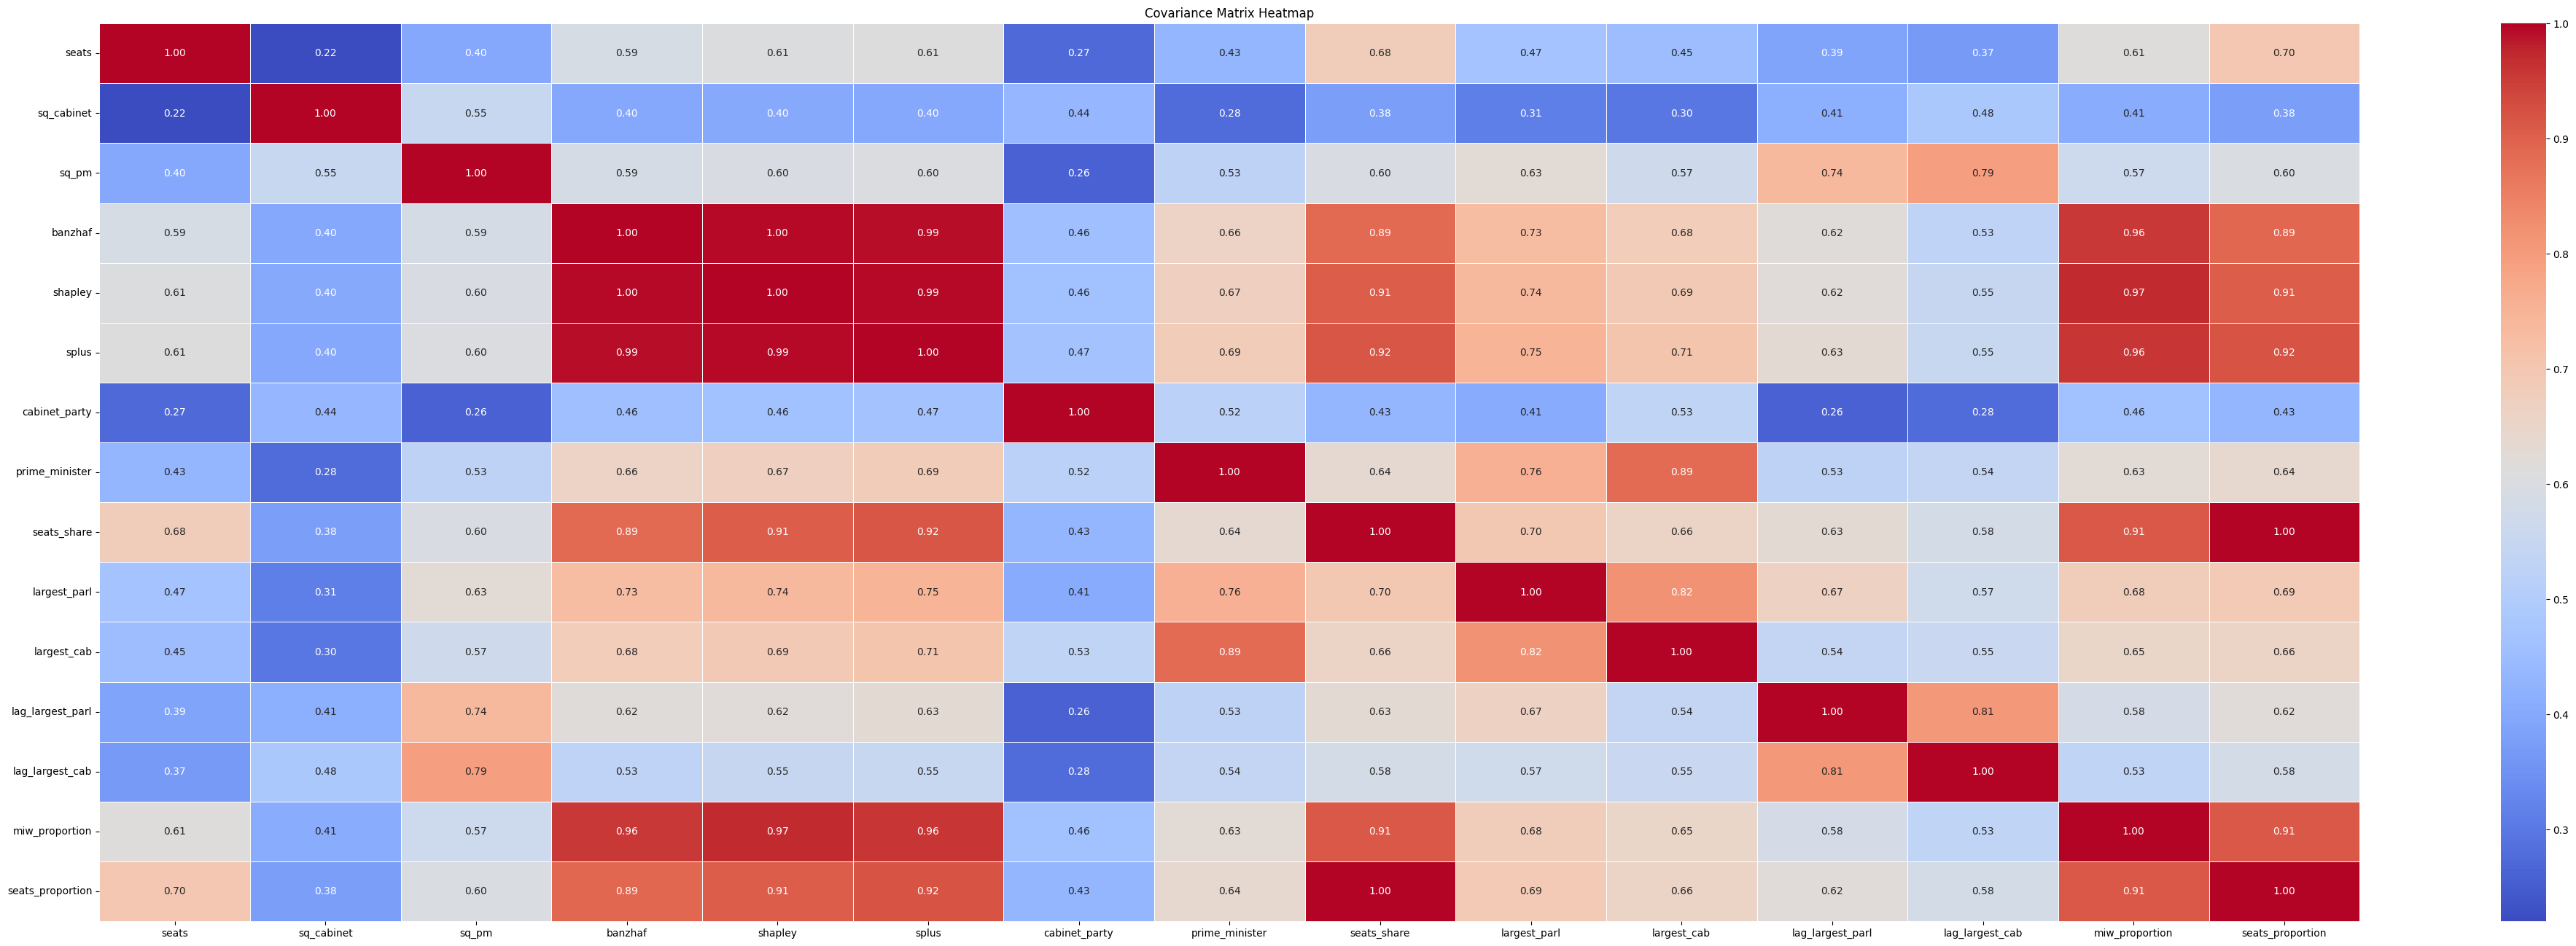

In [178]:

# Standardize the data
data_standardized = (df - df.mean()) / df.std()
data_standardized = data_standardized.drop(columns= dependent_variable, axis=1)
# Create a covariance matrix
cov_matrix = data_standardized.cov()

# Create a heatmap using Seaborn
plt.figure(figsize=(50, 16))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Covariance Matrix Heatmap')
plt.show()

In [179]:
#Calculate the correlation matrix for all the independent variables, then narrow it down to X independent variables
correlation_matrix = df.corr()
correlation_X = df.corr()
print("Correlation Matrix:")
print(correlation_X[dependent_variable])

#Calculate the covariance matrix, then narrowed down to X independent variables
numpy = df.to_numpy()
numpy_X = df.to_numpy()
covariance_matrix = np.cov(numpy_X, rowvar=False)
print("Covariance Matrix:")
print(covariance_matrix)


#Calculate the Variance Inflation Matrix(VIF) to find any multicollinearity
important_dfilled = df.drop(dependent_variable, axis = 'columns')
variables = important_dfilled.values
vif_values = [variance_inflation_factor(variables, i) for i in range(important_dfilled.shape[1])]
# Create a DataFrame to display the results
vif_df = pd.DataFrame({'Variable': important_dfilled.columns, 'VIF': vif_values})
print("VIF Table:")
print(vif_df)

Correlation Matrix:
seats                 0.490097
sq_cabinet            0.379424
sq_pm                 0.467358
banzhaf               0.759571
shapley               0.761492
splus                 0.774911
cabinet_party         0.770343
prime_minister        0.767971
seats_share           0.712447
largest_parl          0.645381
largest_cab           0.776403
lag_largest_parl      0.472591
lag_largest_cab       0.468447
miw_proportion        0.718868
cabinet_proportion    1.000000
seats_proportion      0.713932
Name: cabinet_proportion, dtype: float64
Covariance Matrix:
[[2.15670026e+03 4.77698658e+00 6.15954588e+00 3.97073996e+00
  3.96957977e+00 4.00092811e+00 6.08825454e+00 6.72646592e+00
  3.81362378e+02 7.34048892e+00 7.11472603e+00 5.99338735e+00
  5.66564345e+00 3.08589490e+00 5.16037606e+00 4.02162783e+00]
 [4.77698658e+00 2.18128179e-01 8.56976464e-02 2.68984609e-02
  2.65157017e-02 2.61720941e-02 9.72315031e-02 4.32850262e-02
  2.13479169e+00 4.91610053e-02 4.71447266e-02 6.43

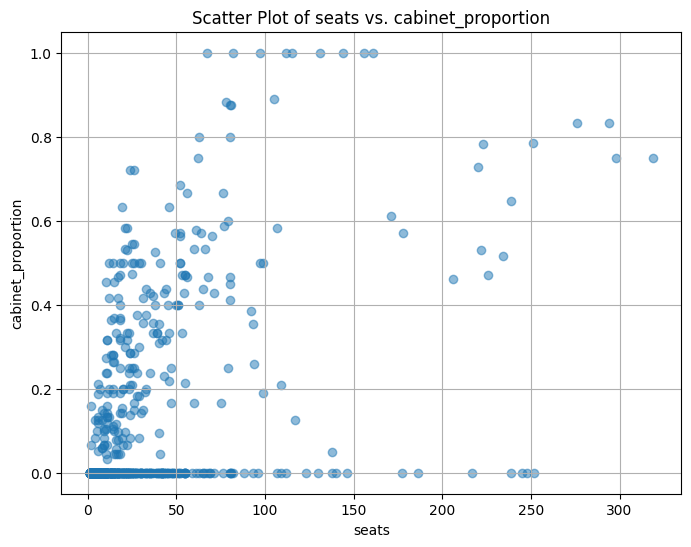

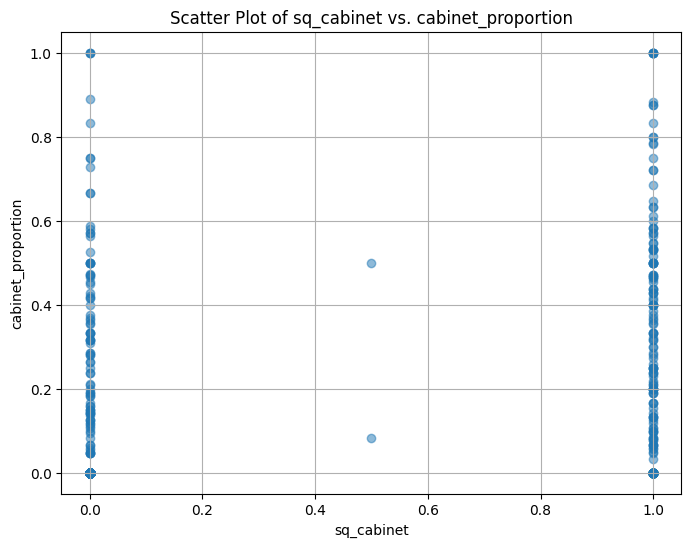

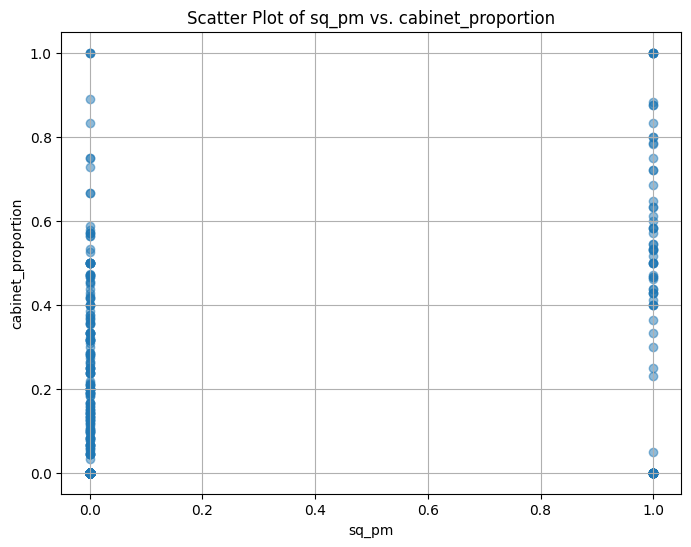

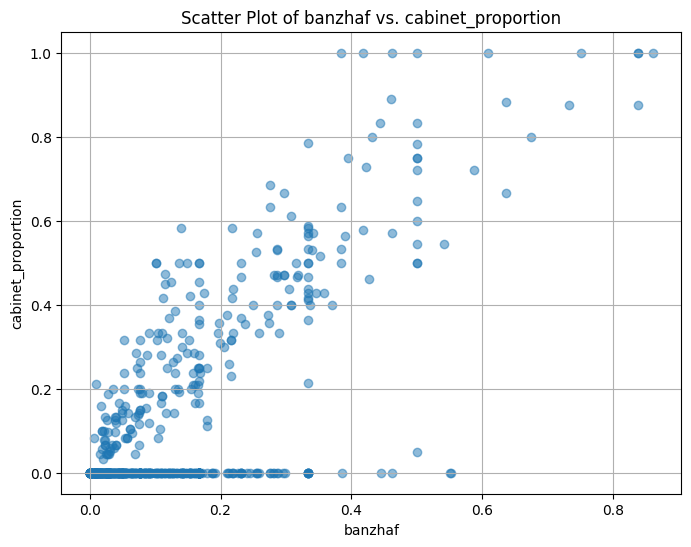

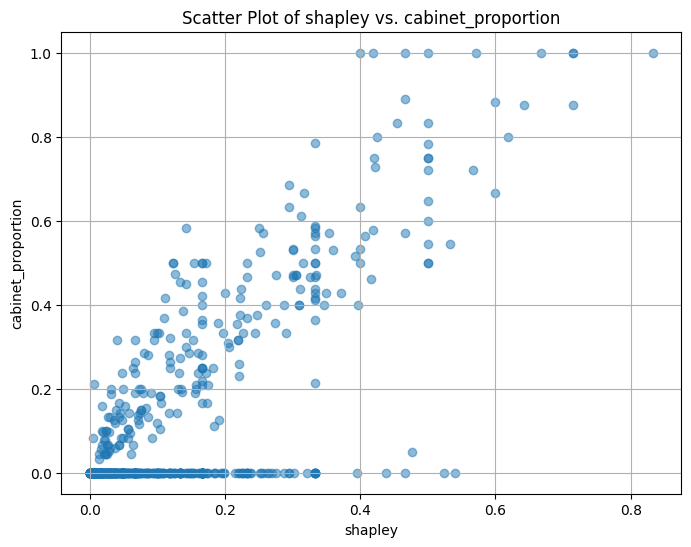

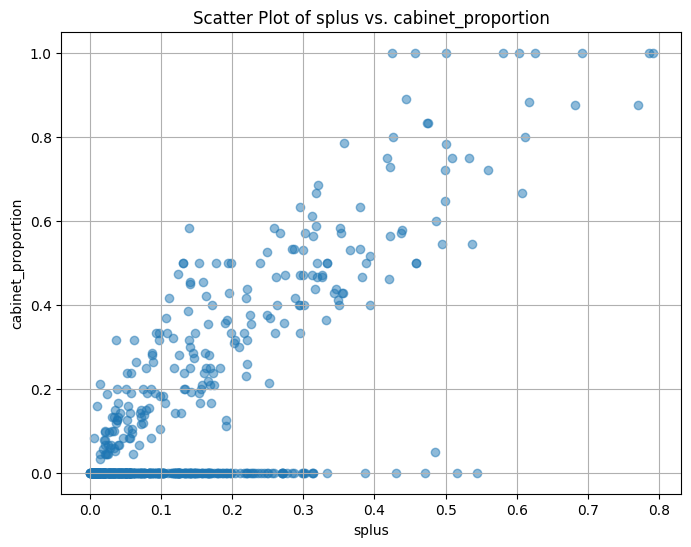

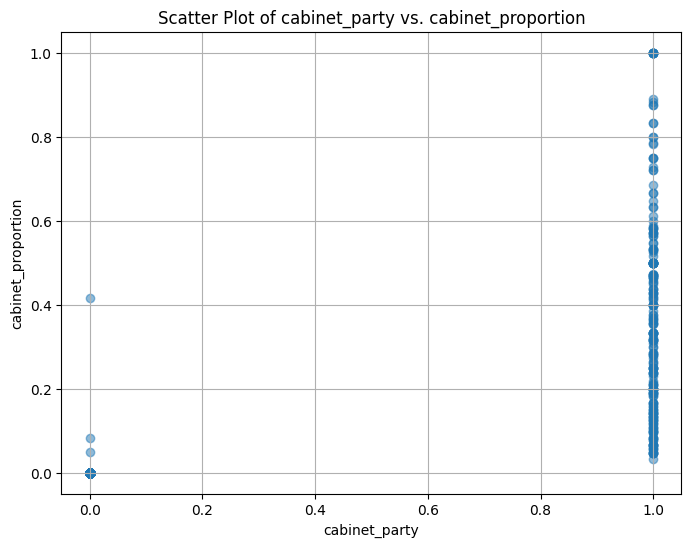

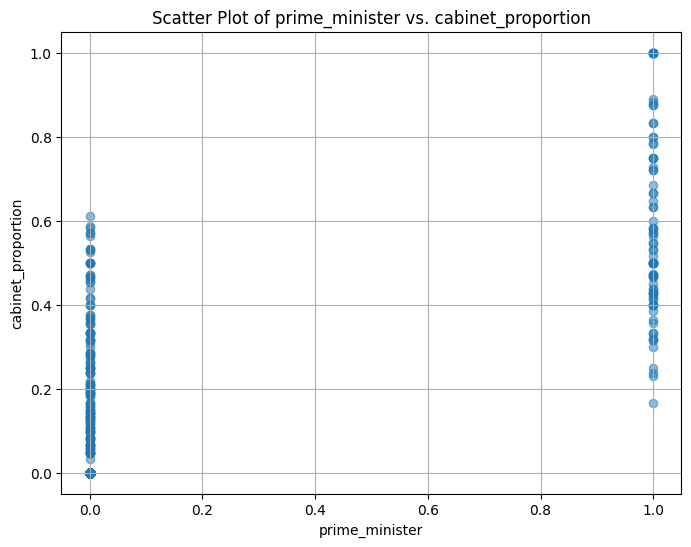

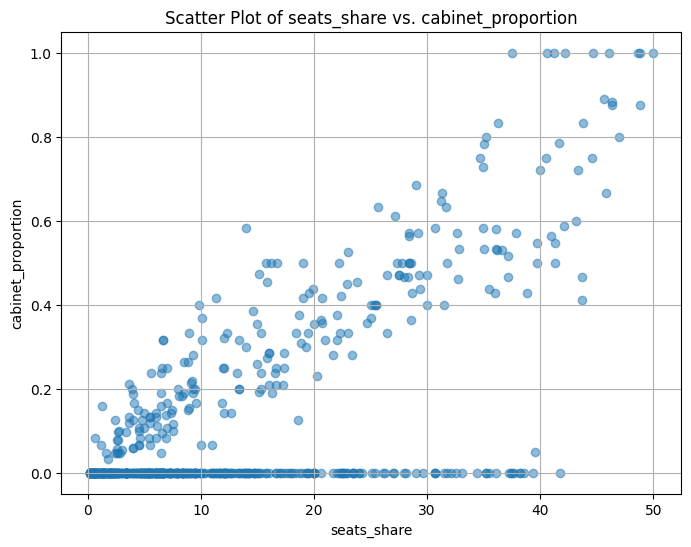

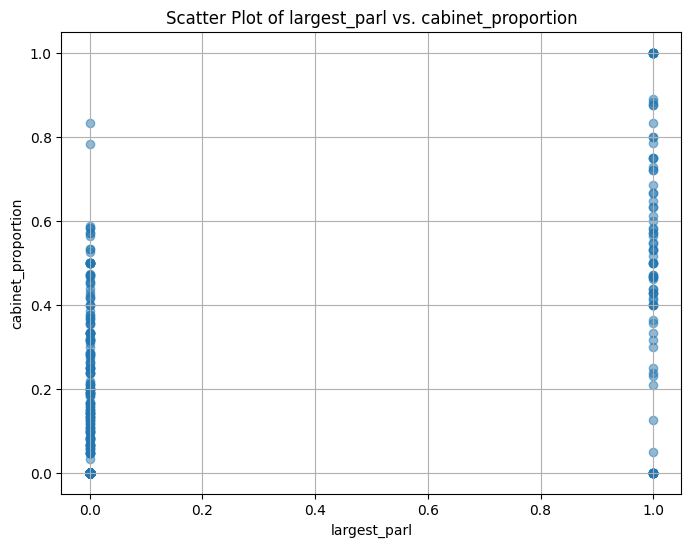

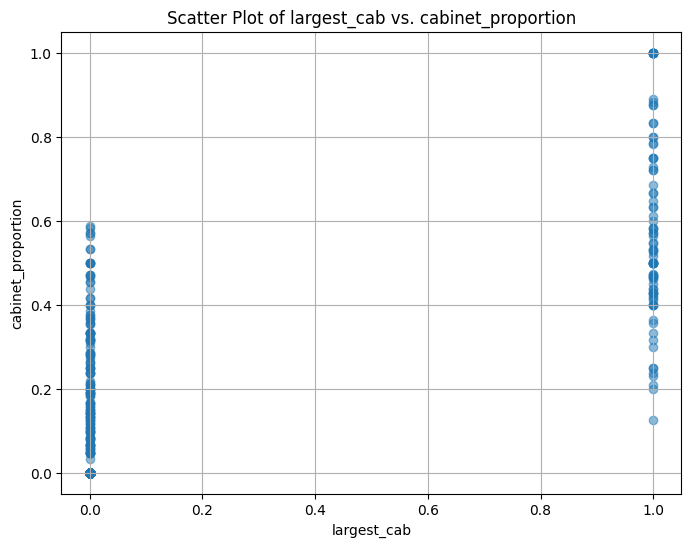

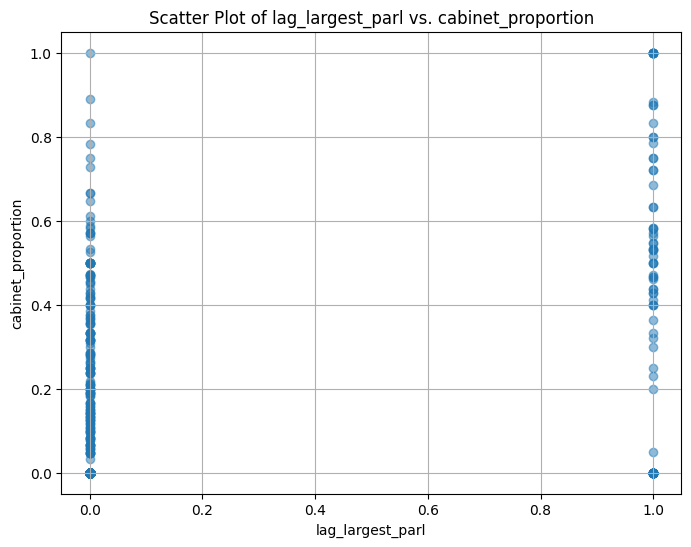

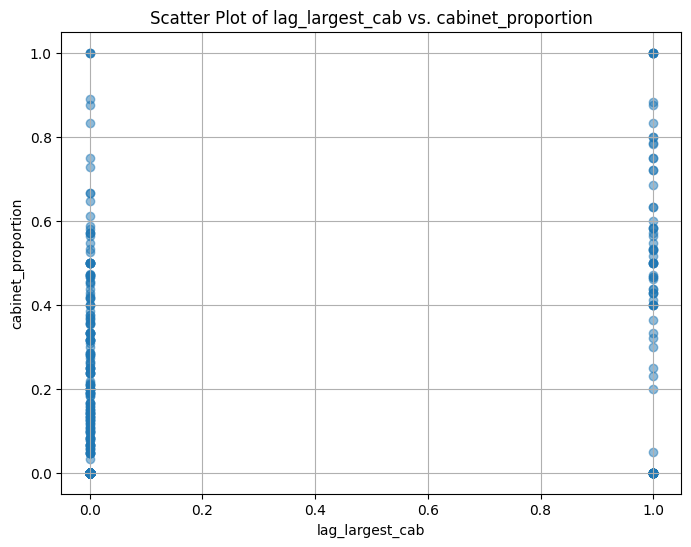

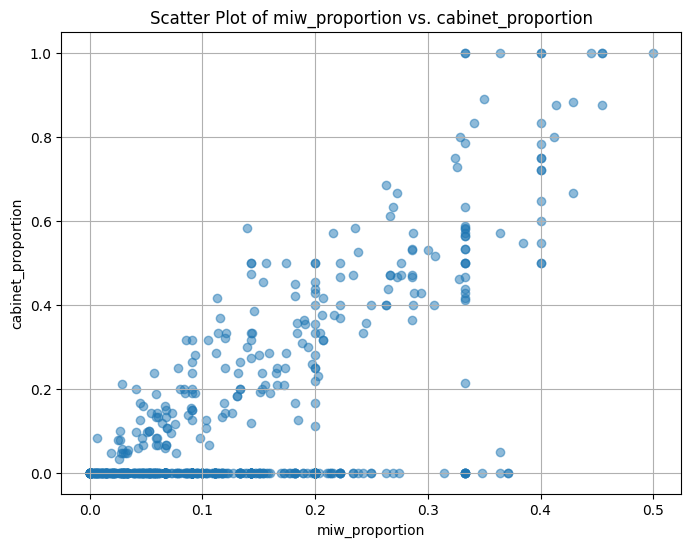

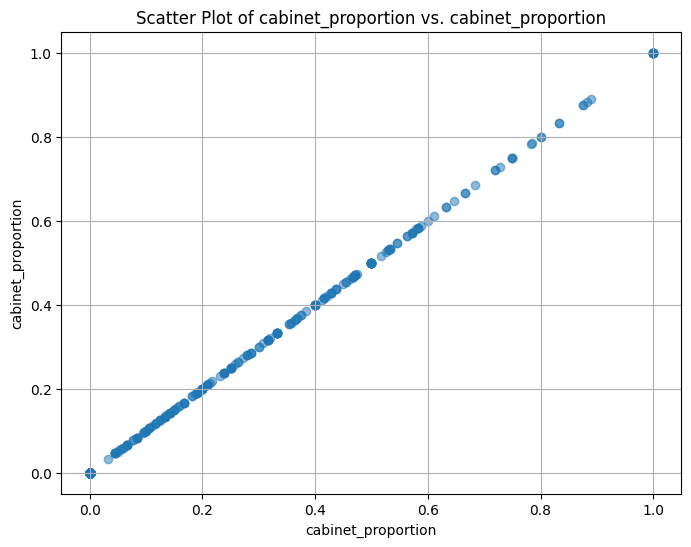

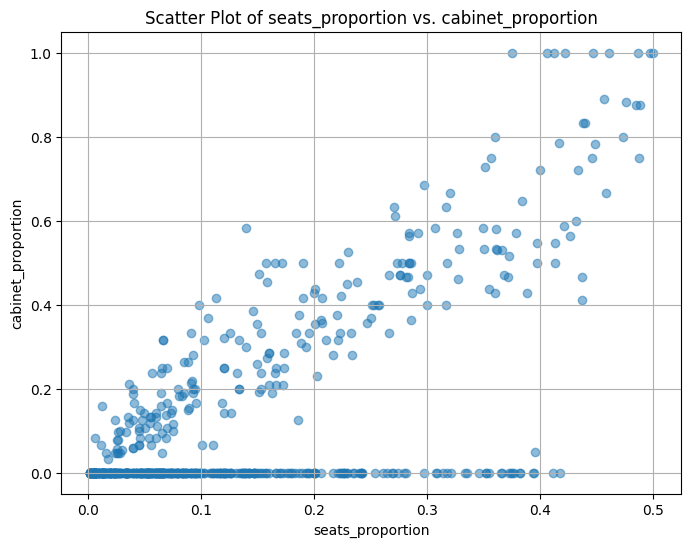

In [180]:

# Create scatter plots for each column with respect to the dependent variable
for column in column_names:
   plt.figure(figsize=(8, 6))
   plt.scatter(df[column], df[dependent_variable], alpha=0.5)
   plt.title(f'Scatter Plot of {column} vs. {dependent_variable}')
   plt.xlabel(column)
   plt.ylabel(dependent_variable)
   plt.grid(True)
   plt.savefig(f'plot_{column}.png', dpi=300)
   plt.show()

In [181]:
#Create LINEAR REGRESSION MODEL FROM OLS
x = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
# Get the coefficients and variable names
coefficientsOLS = model.params  # Include the intercept
variable_names = X
equation = " + ".join(f"{b:.4f}*{var}" for b, var in zip(coefficientsOLS, variable_names))
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     cabinet_proportion   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.899
Method:                 Least Squares   F-statistic:                              389.6
Date:                Thu, 14 Dec 2023   Prob (F-statistic):                   2.15e-310
Time:                        04:21:41   Log-Likelihood:                          710.29
No. Observations:                 657   AIC:                                     -1391.
Df Residuals:                     642   BIC:                                     -1323.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [182]:
#Decision Tree Model
# Test train split and instantiate the DecisionTreeRegressor model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=30)

# Define the parameter grid to search through
param_grid = {
    'criterion': ['friedman_mse', 'squared_error', 'poisson', 'absolute_error'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [1,2,3,4,5],
     'ccp_alpha': [0.0, 0.01, 0.1, 0.2, 0.5, 1.0, 2.0]
}


model = DecisionTreeRegressor()

# Use GridSearchCV to find the best combination of hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', error_score='raise')
grid_search.fit(X_train, y_train)

#model.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Mean Squared Error:", -grid_search.best_score_)

model = grid_search.best_estimator_

# Make predictions on the training set
y_pred_train = model.predict(X)

# Calculate the Mean Squared Error (MSE) for training data
mse_train = mean_squared_error(Y, y_pred_train)
print("Mean Squared Error on Training Data:", mse_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Data:", mse)

# Get the R-squared on the test set
r_squared = model.score(X_test, y_test)
print("R-squared:", r_squared)

Best Parameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Mean Squared Error: 0.005190597652527759
Mean Squared Error on Training Data: 0.002216740147211226
Mean Squared Error on Test Data: 0.0020742193440828993
R-squared: 0.9639758560461477


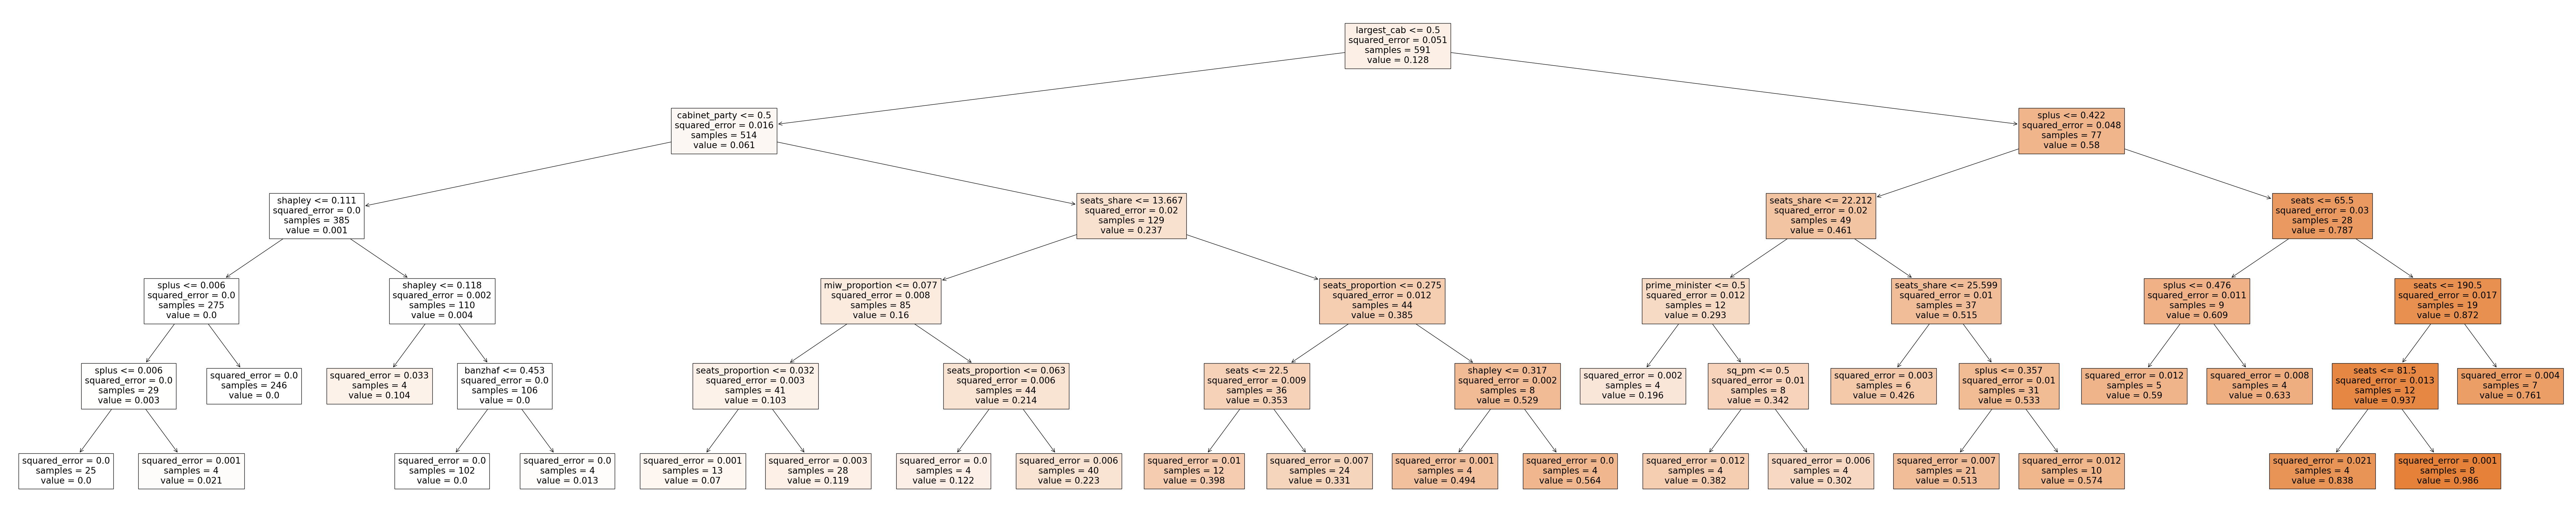

In [183]:
# Display the decision tree
plt.figure(figsize=(100, 20))
plot_tree(model, feature_names = list(X.columns),  filled = True)
plt.show()

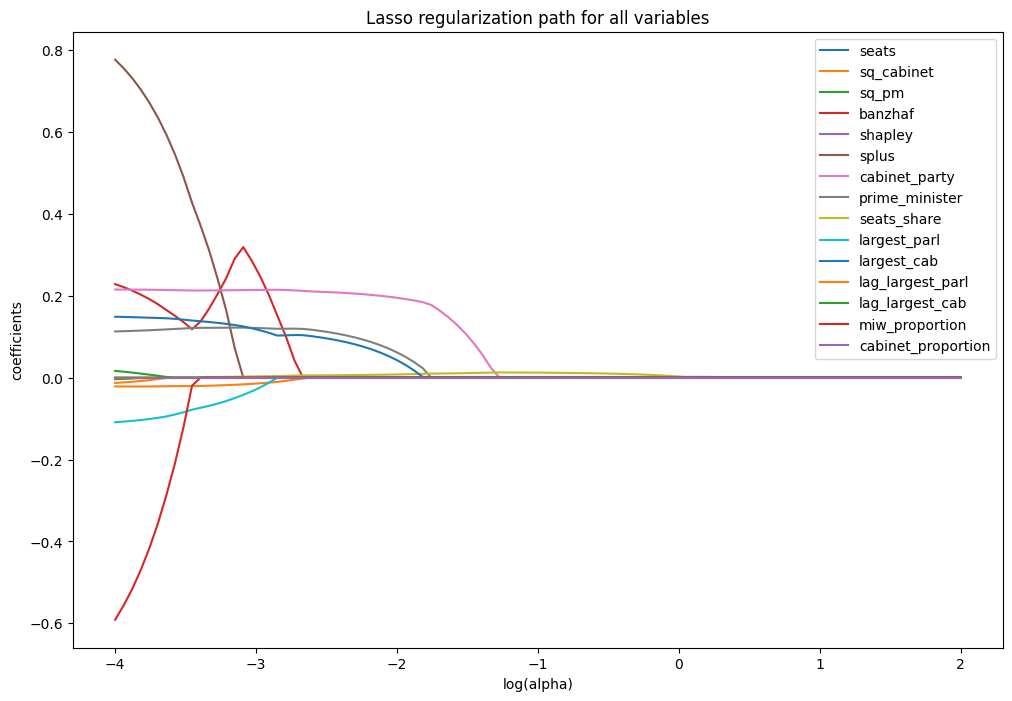

In [184]:
# Choose a range of alpha values
alphas = np.logspace(-4, 2, 100)

# Initialize an array to store coefficients for each alpha
coefs = []

# Fit Lasso for each alpha value
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X, Y)
    coefs.append(lasso_model.coef_)

# Plot the regularization path
coefs = np.array(coefs)
plt.figure(figsize=(12, 8))

for i in range(coefs.shape[1]):
    plt.plot(np.log10(alphas), coefs[:, i], label=f'{df.columns[i]}')

plt.xlabel('log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso regularization path for all variables')
plt.legend()
plt.show()

In [185]:
#Lasso Regularization with k-fold cross validation

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_std, Y, test_size=0.2, random_state=42)

# Create a LassoCV model with k-fold cross-validation
lasso_cv = LassoCV(alphas=np.logspace(-4, 4, 100), cv=5) 
# Fit the model on the standardized data
lasso_cv.fit(X_std, Y)

# Display the optimal alpha chosen by cross-validation
print("Optimal alpha:", lasso_cv.alpha_)

# Display the coefficients
print("Coefficients:", lasso_cv.coef_)

# Perform k-fold cross-validation and display the mean R-squared
cv_score = cross_val_score(lasso_cv, X_std, Y, cv=5, scoring='r2')
print("Mean R-squared:", np.mean(cv_score))

# Get training predictions
y_train_pred = lasso_cv.predict(X_train)

# Get test predictions
y_test_pred = lasso_cv.predict(X_test)

# Calculate training MSE and R-squared
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate test MSE and R-squared
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display results
print("Training MSE:", train_mse)
print("Training R-squared:", train_r2)
print("Test MSE:", test_mse)
print("Test R-squared:", test_r2)

# Get the feature names from your original dataset
feature_names = df.columns

# Create the equation string
equation = f"{lasso_cv.intercept_:.4f}"  # Intercept

for feature, coefficient in zip(feature_names, lasso_cv.coef_):
    equation += f" + {coefficient:.4f} * {feature}"

# Print the equation
print("Equation:", equation)

Optimal alpha: 0.0006428073117284319
Coefficients: [ 0.00648194 -0.00938975 -0.00040873  0.02514904  0.          0.12264325
  0.10222197  0.03733422  0.00940145 -0.03553285  0.04905995 -0.00317669
  0.00375546 -0.06530897  0.        ]


c:\Users\benja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0027661428046972247, tolerance: 0.0026925288481051066
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\benja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002538710676114775, tolerance: 0.0024909347000096594
  model = cd_fast.enet_coordinate_descent_gram(


Mean R-squared: 0.8363700320720285
Training MSE: 0.006554991078619206
Training R-squared: 0.8721144987075906
Test MSE: 0.006716199733410161
Test R-squared: 0.8692747380378466
Equation: 0.1294 + 0.0065 * seats + -0.0094 * sq_cabinet + -0.0004 * sq_pm + 0.0251 * banzhaf + 0.0000 * shapley + 0.1226 * splus + 0.1022 * cabinet_party + 0.0373 * prime_minister + 0.0094 * seats_share + -0.0355 * largest_parl + 0.0491 * largest_cab + -0.0032 * lag_largest_parl + 0.0038 * lag_largest_cab + -0.0653 * miw_proportion + 0.0000 * cabinet_proportion


In [186]:
#PCA with all variables passed in
X_standardized = StandardScaler().fit_transform(X)
# Create a PCA instance
n = 10
pca = PCA(n_components=n) 
pca.fit(X_standardized)
# Fit the PCA model to the standardized data
principal_components = pca.fit_transform(X_standardized)
# Create column names for principal components
pc_columns = ['PC' + str(i) for i in range(1, n + 1)]

# Create a DataFrame for the principal components
pc_df = pd.DataFrame(data=principal_components, columns=pc_columns)
#print(pc_df)
# Get the explained variance of each principal component
eigenvalues = pca.explained_variance_

# Calculate the cumulative explained variance
cumulative_eigenvalues = np.cumsum(eigenvalues) 

# Create a DataFrame for visualization
eigenvalues_df = pd.DataFrame({'Explained Variance': eigenvalues,
                             'Cumulative Explained Variance': cumulative_eigenvalues})

print ("Variance explained by each latent variable in PCA: ", pca.explained_variance_ratio_)

# Display the DataFrame
print(eigenvalues_df)


Variance explained by each latent variable in PCA:  [0.65200491 0.09165577 0.06962954 0.06134092 0.03711005 0.02521412
 0.01755132 0.01424767 0.01210087 0.00914581]
   Explained Variance  Cumulative Explained Variance
0            9.794982                       9.794982
1            1.376932                      11.171915
2            1.046035                      12.217950
3            0.921516                      13.139466
4            0.557499                      13.696965
5            0.378788                      14.075754
6            0.263671                      14.339425
7            0.214041                      14.553466
8            0.181790                      14.735255
9            0.137396                      14.872652


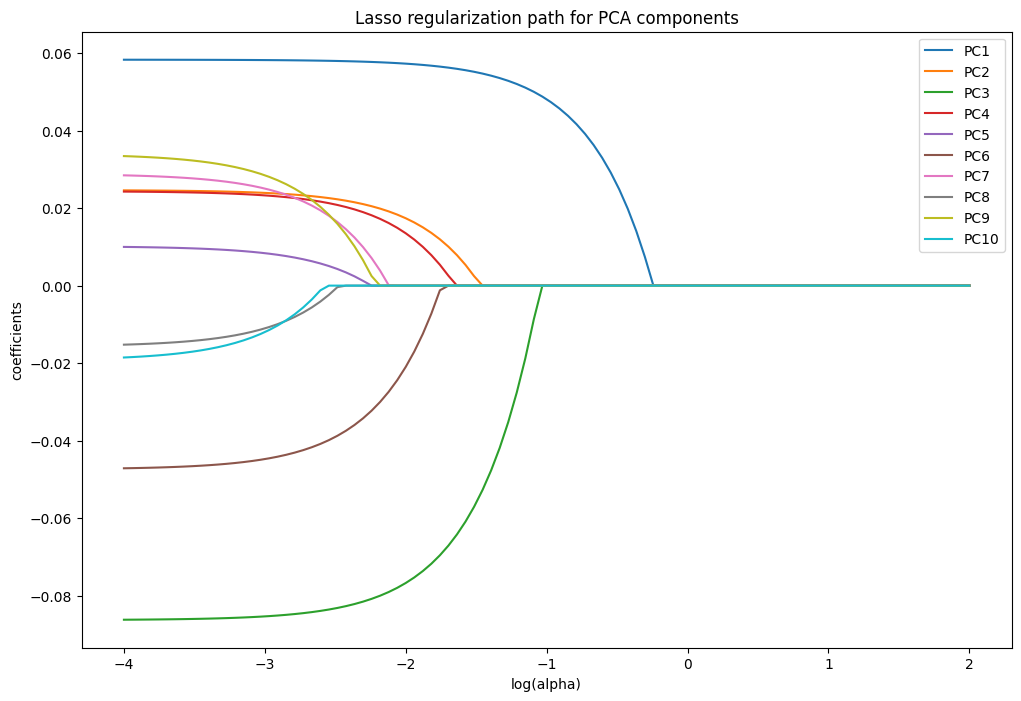

In [187]:
# Choose a range of alpha values
alphas = np.logspace(-4, 2, 100)

# Initialize an array to store coefficients for each alpha
coefs = []

# Fit Lasso for each alpha value
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(principal_components, Y)
    coefs.append(lasso_model.coef_)

# Plot the regularization path
coefs = np.array(coefs)
plt.figure(figsize=(12, 8))

for i in range(coefs.shape[1]):
    plt.plot(np.log10(alphas), coefs[:, i], label=f'PC{i + 1}')

plt.xlabel('log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso regularization path for PCA components')
plt.legend()
plt.show()

In [188]:
#Lasso model with the PCA components
# Create a LassoCV model with cross-validation
lasso_cv_model = LassoCV(cv=len(principal_components))  

# Fit the LassoCV model on the data
lasso_cv_model.fit(principal_components, Y)

# Get the optimal alpha from LassoCV
optimal_alpha = lasso_cv_model.alpha_

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Initialize an array to store predictions
predictions = []

# Perform Leave-One-Out Cross-Validation
for train_index, test_index in loo.split(principal_components):
    X_train, X_test = principal_components[train_index], principal_components[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Create a Lasso model with the optimal alpha
    lasso_model = Lasso(alpha=optimal_alpha)

    # Fit the Lasso model on the training set
    lasso_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = lasso_model.predict(X_test)

    # Store the prediction
    predictions.append(y_pred[0])

# Calculate the mean squared error
mse = mean_squared_error(Y, predictions)

# Calculate R-squared for this alpha
r2 = r2_score(Y, predictions)

# Store the coefficients for the equation
equation = f'y = {lasso_model.intercept_:.4f}'
equation += ' + '
equation += ' + '.join([f'{coef:.4f} * PC{i + 1}' for i, coef in enumerate(lasso_model.coef_)])
print(f'Optimal Alpha: {optimal_alpha:.4f}')
print(f'Mean Squared Error (Lasso + LOOCV): {mse}')
print(f'R-Squared: {r2}')
print(f'Equation: {equation}')

Optimal Alpha: 0.0006
Mean Squared Error (Lasso + LOOCV): 0.007924692528875163
R-Squared: 0.8456043603206009
Equation: y = 0.1293 + 0.0583 * PC1 + 0.0243 * PC2 + -0.0858 * PC3 + 0.0238 * PC4 + 0.0091 * PC5 + -0.0459 * PC6 + 0.0267 * PC7 + -0.0130 * PC8 + 0.0309 * PC9 + -0.0151 * PC10


In [189]:
#PCA with all the multicollinear variables, as shown in the covariance heatmap
columns = ['banzhaf', 'shapley', 'splus', 'miw_proportion', 'seats_proportion', 'seats_share']
X_standardized = StandardScaler().fit_transform(X[columns])
# Create a PCA instance
n = 1
pca = PCA(n_components=n) 
pca.fit(X_standardized)
# Fit the PCA model to the standardized data
pc = pca.fit_transform(X_standardized)
# Create column names for principal components
pc_columns = ['PC' + str(i) for i in range(1, n + 1)]

# Create a DataFrame for the principal components
new_df = pd.DataFrame(data=pc, columns=pc_columns)
#print(passing_df)
columns_to_add = new_df.columns.difference(df.columns)

# Get the explained variance of each principal component
eigenvalues = pca.explained_variance_

# Calculate the cumulative explained variance
cumulative_eigenvalues = np.cumsum(eigenvalues) 

# Create a DataFrame for visualization
eigenvalues_df = pd.DataFrame({'Explained Variance': eigenvalues,
                             'Cumulative Explained Variance': cumulative_eigenvalues})

print ("Variance explained by each latent variable in PCA: ", pca.explained_variance_ratio_)

# Display the DataFrame
print(eigenvalues_df)
print(new_df)

Variance explained by each latent variable in PCA:  [0.95160188]
   Explained Variance  Cumulative Explained Variance
0            5.718315                       5.718315
          PC1
0   -1.491552
1    5.893208
2   -0.929852
3    0.238362
4    4.480637
..        ...
652 -2.118068
653  4.314443
654  2.352023
655 -1.317691
656 -2.078836

[657 rows x 1 columns]


In [190]:
#Regression on PCA Variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_df, Y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear_train = linear_model.predict(X_train)
y_pred_linear_test = linear_model.predict(X_test)

# Polynomial Regression
degree = 2  
poly = PolynomialFeatures(degree=degree)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)
# Make predictions
y_pred_poly_train = poly_model.predict(X_poly_train)
y_pred_poly_test = poly_model.predict(X_poly_test)

# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r_squared = r2_score(y_true, y_pred)
    print(f"{model_name} - Training MSE: {mse:.4f}, R-squared: {r_squared:.4f}")

# Display results
evaluate_model(y_train, y_pred_linear_train, "Linear Regression (Train)")
evaluate_model(y_test, y_pred_linear_test, "Linear Regression (Test)")

evaluate_model(y_train, y_pred_poly_train, "Polynomial Regression (Train)")
evaluate_model(y_test, y_pred_poly_test, "Polynomial Regression (Test)")

# Display the equations
def get_equation(model, feature_names):
    coef = model.coef_
    intercept = model.intercept_
    terms = [f"{coef[i]:.4f} * {feature}" for i, feature in enumerate(feature_names)]
    equation = f"{intercept:.4f} + {' + '.join(terms)}"
    return equation

# # Get the feature names after PCA
# feature_names_pca = [f"PC{i + 1}" for i in range(n_components)]

# Get the linear regression equation
linear_equation = get_equation(linear_model, pc_columns)

# Get the polynomial regression equation
poly_feature_names = [f"{i}^{j}" for i in pc_columns for j in range(1, degree + 1)]
poly_equation = get_equation(poly_model, poly_feature_names)
print("Linear Equation")
print(linear_equation)
print("Polynomial Equation")
print(poly_equation)



Linear Regression (Train) - Training MSE: 0.0212, R-squared: 0.5863
Linear Regression (Test) - Training MSE: 0.0242, R-squared: 0.5289
Polynomial Regression (Train) - Training MSE: 0.0202, R-squared: 0.6056
Polynomial Regression (Test) - Training MSE: 0.0237, R-squared: 0.5379
Linear Equation
0.1345 + 0.0740 * PC1
Polynomial Equation
0.1116 + 0.0000 * PC1^1 + 0.0653 * PC1^2


In [229]:
#Try a decision tree on the PCA Variable
#Decision Tree Model
X_train, X_test, y_train, y_test = train_test_split(new_df, Y, test_size=0.2, random_state=42)

# Define the parameter grid to search through
param_grid = {
    'criterion': ['friedman_mse', 'squared_error', 'poisson', 'absolute_error'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [1,2,3,4,5],
     'ccp_alpha': [0.0, 0.01, 0.1, 0.2, 0.5, 1.0, 2.0]
}


pca_model = DecisionTreeRegressor()

# Use GridSearchCV to find the best combination of hyperparameters
grid_search = GridSearchCV(pca_model, param_grid, cv=5, scoring='neg_mean_squared_error', error_score='raise')
grid_search.fit(X_train, y_train)

#model.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Mean Squared Error:", -grid_search.best_score_)

pca_model = grid_search.best_estimator_

# Make predictions on the training set
y_pred_train = pca_model.predict(new_df)

# Calculate the Mean Squared Error (MSE) for training data
mse_train = mean_squared_error(Y, y_pred_train)
print("Mean Squared Error on Training Data:", mse_train)

# Make predictions
y_pred = pca_model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Data:", mse)

# Get the R-squared on the test set
r_squared = pca_model.score(X_test, y_test)
print("R-squared:", r_squared)

Best Parameters: {'ccp_alpha': 0.0, 'criterion': 'poisson', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Mean Squared Error: 0.021112223139222838
Mean Squared Error on Training Data: 0.0183330737406026
Mean Squared Error on Test Data: 0.021917449132793827
R-squared: 0.5733950160574136


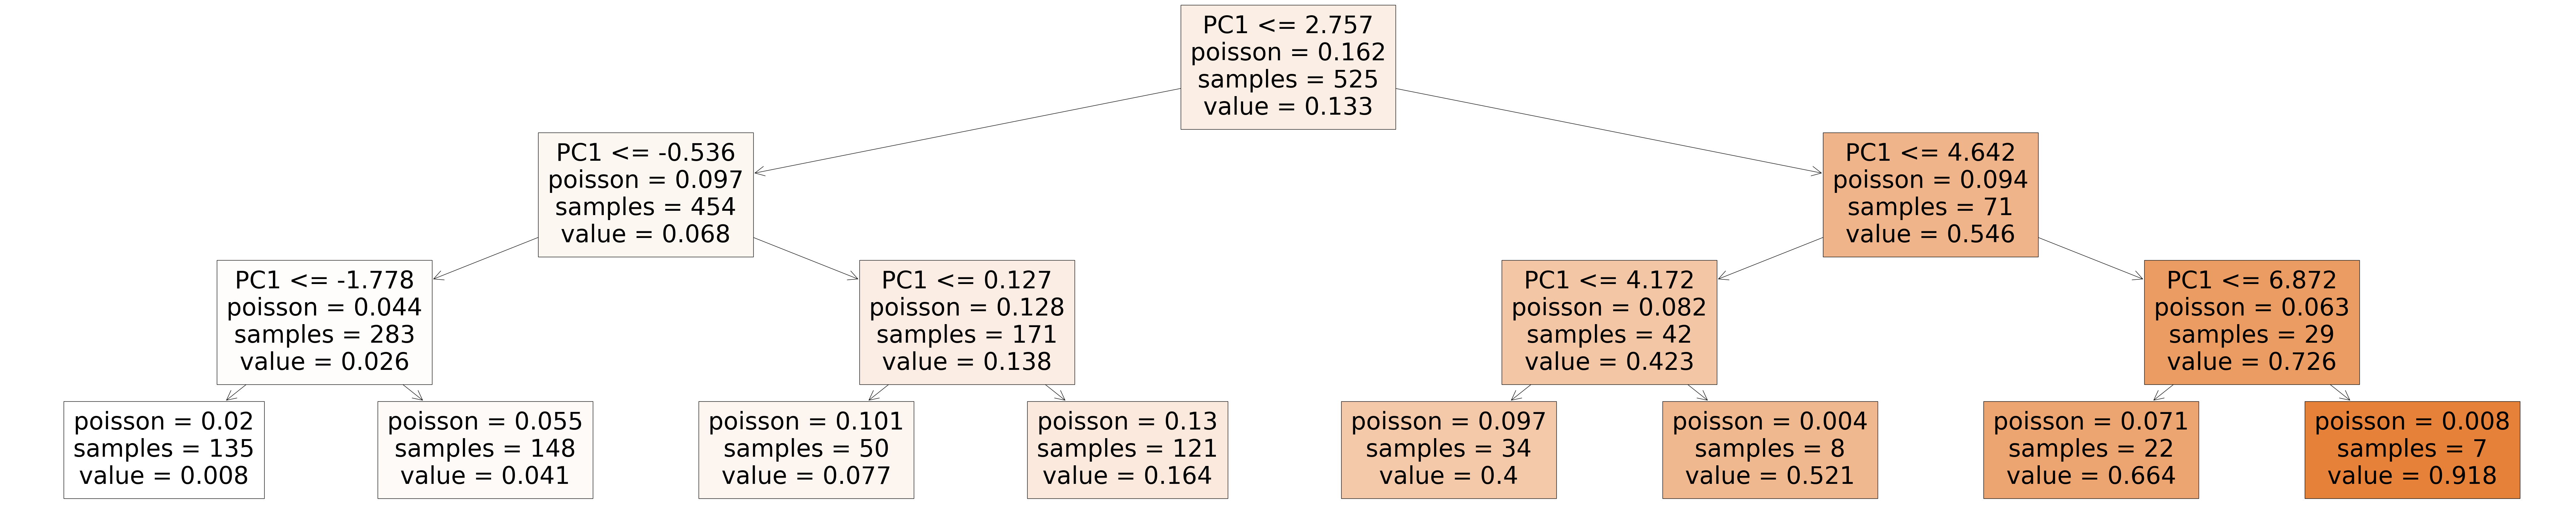

In [230]:
# Display the decision tree
plt.figure(figsize=(100, 20))
plot_tree(pca_model, feature_names = list(new_df.columns),  filled = True)
plt.show()

In [209]:
#PCA with all the other multicollinear variables, as shown in the covariance heatmap
passing_columns = [  'cabinet_party', 'prime_minister', 'seats', 'sq_cabinet', 
'sq_pm',  'largest_parl', 'largest_cab', 'lag_largest_parl', 'lag_largest_cab']
X_standardized = StandardScaler().fit_transform(X[passing_columns])
# Create a PCA instance
n = 4
pca_party = PCA(n_components=n) 
pca_party.fit(X_standardized)
# Fit the PCA model to the standardized data
party_pc = pca_passing.fit_transform(X_standardized)

# Create column names for principal components
pc_columns = ['partyPC' + str(i) for i in range(1, n + 1)]
print(pc_columns)
# Access the loadings for each principal component
loadings = pd.DataFrame(pca_party.components_.T, columns=[f'{i}' for i in pc_columns], index=passing_columns)

# Display the loadings
print("Loadings:")
print(loadings)

# Create a DataFrame for the principal components
party_df = pd.DataFrame(data=party_pc, columns=pc_columns)
#print(passing_df)

# Get the explained variance of each principal component
eigenvalues = pca_party.explained_variance_

# Calculate the cumulative explained variance
cumulative_eigenvalues = np.cumsum(eigenvalues) 

# Create a DataFrame for visualization
eigenvalues_df = pd.DataFrame({'Explained Variance': eigenvalues,
                             'Cumulative Explained Variance': cumulative_eigenvalues})

print ("Variance explained by each latent variable in PCA: ", pca_party.explained_variance_ratio_)

# Display the DataFrame
print(eigenvalues_df)
print(party_df)
party_df = party_df.drop(columns = 'partyPC4', axis = 1)
print(party_df)
# print(pc_df)

# # Concatenate the principal components with the original DataFrame
# df = pd.concat([df, passing_df[passing_columns_to_add]], axis=1) 
# for column in passing_columns:
#     if column in df.columns:
#         df.drop(columns = column, inplace=True, axis = 1)
# print(df)

['partyPC1', 'partyPC2', 'partyPC3', 'partyPC4']
Loadings:
                  partyPC1  partyPC2  partyPC3  partyPC4
cabinet_party     0.246100  0.400871 -0.632311  0.004147
prime_minister    0.366185  0.371837  0.091315 -0.205842
seats             0.254513  0.155243  0.206786  0.929264
sq_cabinet        0.248083 -0.343729 -0.668838  0.144657
sq_pm             0.364468 -0.375090  0.048814 -0.017707
largest_parl      0.379036  0.182324  0.214194 -0.135191
largest_cab       0.378472  0.358648  0.094971 -0.192092
lag_largest_parl  0.358976 -0.332520  0.191640 -0.090686
lag_largest_cab   0.361126 -0.381651  0.087934 -0.097167
Variance explained by each latent variable in PCA:  [0.56802595 0.12840423 0.10463016 0.07712949]
   Explained Variance  Cumulative Explained Variance
0            5.120027                       5.120027
1            1.157400                       6.277426
2            0.943107                       7.220533
3            0.695224                       7.915757
     par

In [224]:
#Run regression on all PCA variables
pca_df = pd.concat([new_df, party_df], axis=1)
pca_df_columns = pca_df.columns
print(pca_df)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pca_df, Y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear_train = linear_model.predict(X_train)
y_pred_linear_test = linear_model.predict(X_test)

# # Polynomial Regression
# degree = 2
# poly = PolynomialFeatures(degree=degree)
# X_poly_train = poly.fit_transform(X_train)
# X_poly_test = poly.transform(X_test)

# poly_model = LinearRegression()
# poly_model.fit(X_poly, y_train)
# # Make predictions
# y_pred_poly_train = poly_model.predict(X_poly_train)
# y_pred_poly_test = poly_model.predict(X_poly_test)

# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r_squared = r2_score(y_true, y_pred)
    print(f"{model_name} - Training MSE: {mse:.4f}, R-squared: {r_squared:.4f}")

# Display results
evaluate_model(y_train, y_pred_linear_train, "Linear Regression (Train)")
evaluate_model(y_test, y_pred_linear_test, "Linear Regression (Test)")

# evaluate_model(y_train, y_pred_poly_train, "Polynomial Regression (Train)")
# evaluate_model(y_test, y_pred_poly_test, "Polynomial Regression (Test)")

# Display the equations
def get_equation(model, feature_names):
    coef = model.coef_
    intercept = model.intercept_
    terms = [f"{coef[i]:.4f} * {feature}" for i, feature in enumerate(feature_names)]
    equation = f"{intercept:.4f} + {' + '.join(terms)}"
    return equation

# # Get the feature names after PCA
# feature_names_pca = [f"PC{i + 1}" for i in range(n_components)]

# Get the linear regression equation
linear_equation = get_equation(linear_model, pca_df_columns)

# # Get the polynomial regression equation
# poly_feature_names = [f"{i}^{j}" for i in pca_df_columns for j in range(1, degree + 1)]
# poly_equation = get_equation(poly_model, poly_feature_names)
print("Linear Equation")
print(linear_equation)
# print("Polynomial Equation")
# print(poly_equation)


          PC1  partyPC1  partyPC2  partyPC3
0   -1.491552 -1.288041 -0.049447  0.574707
1    5.893208  6.410413 -0.481952  0.033187
2   -0.929852 -1.348372 -0.086246  0.525690
3    0.238362 -1.342887 -0.082901  0.530146
4    4.480637  6.388475 -0.495333  0.015362
..        ...       ...       ...       ...
652 -2.118068 -1.331918 -0.076210  0.539058
653  4.314443  6.662705 -0.328063  0.238169
654  2.352023 -0.235031  0.057779 -2.179618
655 -1.317691 -1.293525 -0.052792  0.570251
656 -2.078836 -1.326433 -0.072865  0.543514

[657 rows x 4 columns]
Linear Regression (Train) - Training MSE: 0.0091, R-squared: 0.8233
Linear Regression (Test) - Training MSE: 0.0089, R-squared: 0.8276
Linear Equation
0.1322 + 0.0312 * PC1 + 0.0520 * partyPC1 + 0.0737 * partyPC2 + -0.0535 * partyPC3


In [227]:
#Try a decision tree on all of the PCA Variables
#Decision Tree Model
# Test train split and instantiate the DecisionTreeRegressor model
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(pca_df, Y, test_size=0.2, random_state=42)

# Define the parameter grid to search through
param_grid = {
    'criterion': ['friedman_mse', 'squared_error', 'poisson', 'absolute_error'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [1,2,3,4,5],
     'ccp_alpha': [0.0, 0.01, 0.1, 0.2, 0.5, 1.0, 2.0]
}


full_pca_model = DecisionTreeRegressor()

# Use GridSearchCV to find the best combination of hyperparameters
grid_search = GridSearchCV(full_pca_model, param_grid, cv=5, scoring='neg_mean_squared_error', error_score='raise')
grid_search.fit(pca_X_train, pca_y_train)

#model.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Mean Squared Error:", -grid_search.best_score_)

full_pca_model = grid_search.best_estimator_

# Make predictions on the training set
y_pred_train = full_pca_model.predict(pca_df)

# Calculate the Mean Squared Error (MSE) for training data
mse_train = mean_squared_error(Y, y_pred_train)
print("Mean Squared Error on Training Data:", mse_train)

# Make predictions
y_pred = full_pca_model.predict(pca_X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(pca_y_test, y_pred)
print("Mean Squared Error on Test Data:", mse)

# Get the R-squared on the test set
r_squared = full_pca_model.score(pca_X_test, pca_y_test)
print("R-squared:", r_squared)

Best Parameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Mean Squared Error: 0.009133580411584203
Mean Squared Error on Training Data: 0.003727727146926512
Mean Squared Error on Test Data: 0.007406385362786333
R-squared: 0.8558408467326364


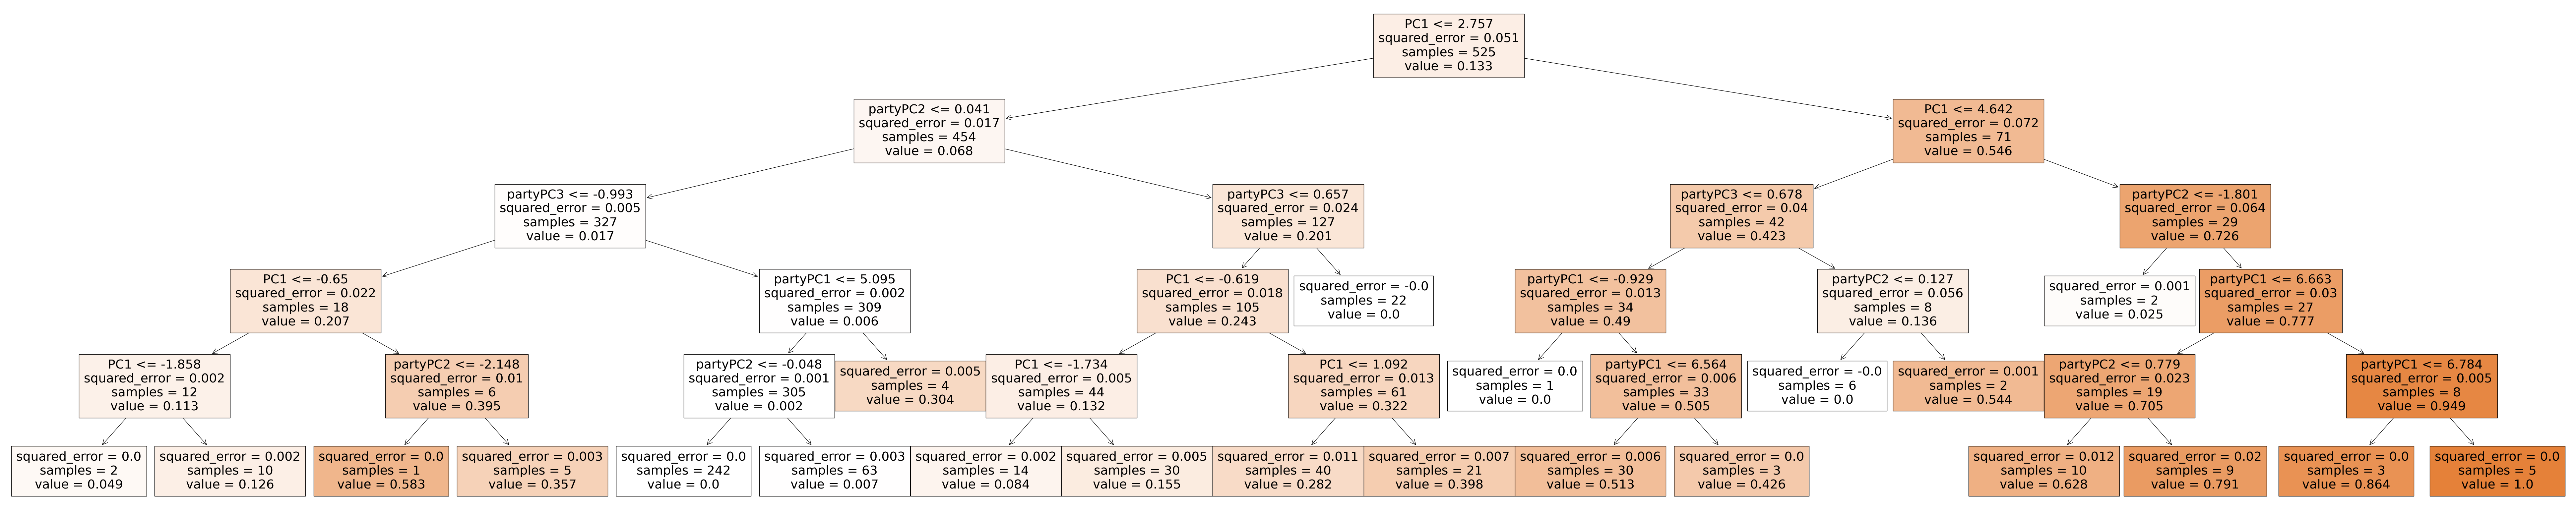

In [228]:
# Display the decision tree
plt.figure(figsize=(100, 20))
plot_tree(full_pca_model, feature_names = list(pca_df.columns),  filled = True)
plt.show()

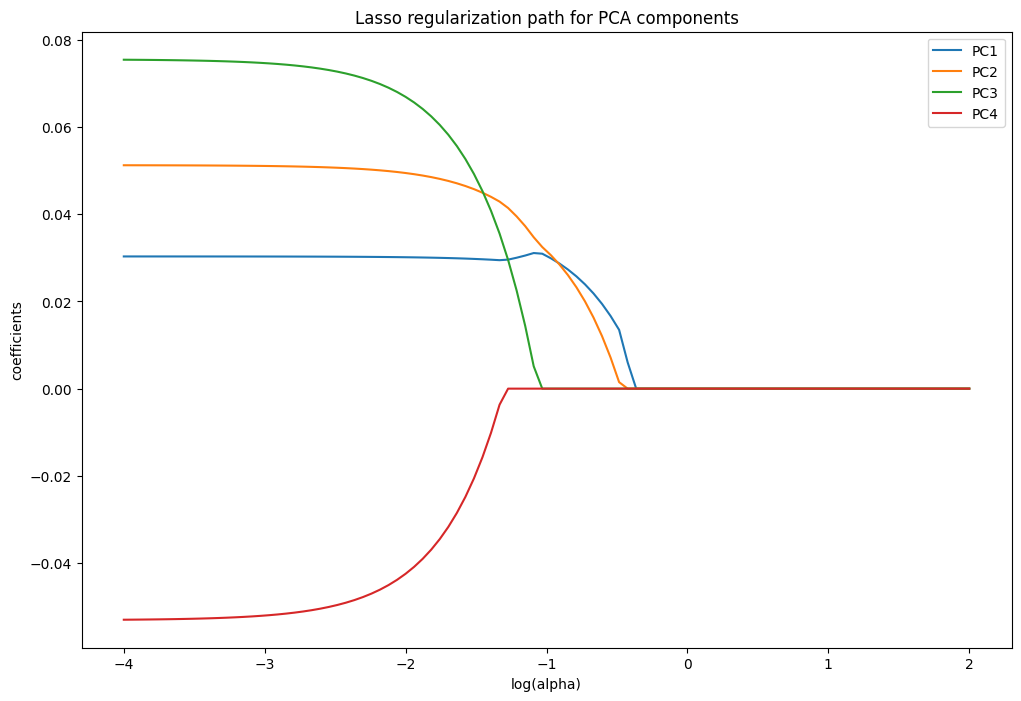

In [221]:
# Choose a range of alpha values
alphas = np.logspace(-4, 2, 100)

# Initialize an array to store coefficients for each alpha
coefs = []

# Fit Lasso for each alpha value
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(pca_df, Y)
    coefs.append(lasso_model.coef_)

# Plot the regularization path
coefs = np.array(coefs)
plt.figure(figsize=(12, 8))

for i in range(coefs.shape[1]):
    plt.plot(np.log10(alphas), coefs[:, i], label=f'PC{i + 1}')

plt.xlabel('log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso regularization path for PCA components')
plt.legend()
plt.show()

In [212]:
# Create a LassoCV model with cross-validation
lasso_cv_model = LassoCV(cv=len(pca_df), random_state=42)

# Fit the LassoCV model on the data
lasso_cv_model.fit(pca_df, Y)

# Get the optimal alpha from LassoCV
optimal_alpha = lasso_cv_model.alpha_

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Initialize arrays to store results
predictions = []
true_values = []

# Perform Leave-One-Out Cross-Validation
for train_index, test_index in loo.split(pca_df):
    X_train, X_test = pca_df.iloc[train_index], pca_df.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Create a Lasso model with the optimal alpha
    lasso_model = Lasso(alpha=optimal_alpha)

    # Fit the Lasso model on the training set
    lasso_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = lasso_model.predict(X_test)

    # Store the prediction and true value
    predictions.append(y_pred[0])
    true_values.append(y_test.iloc[0])

# Calculate the mean squared error
mse = mean_squared_error(true_values, predictions)

# Calculate R-squared
r2 = r2_score(true_values, predictions)

# Store the coefficients for the equation
equation = f'y = {lasso_model.intercept_:.4f} + ' + ' + '.join([f'{coef:.4f} * {col}' for coef, col in zip(lasso_model.coef_, pca_df.columns)])
print(f'Optimal Alpha: {optimal_alpha:.4f}')
print(f'Mean Squared Error (Lasso + LOOCV): {mse:.4f}')
print(f'R-Squared: {r2:.4f}')
print(f'Equation: {equation}')

Optimal Alpha: 0.0004
Mean Squared Error (Lasso + LOOCV): 0.0093
R-Squared: 0.8195
Equation: y = 0.1293 + 0.0303 * PC1 + 0.0512 * partyPC1 + 0.0752 * partyPC2 + -0.0527 * partyPC3
